In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(style="white", context="talk")
#sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

In [2]:
df = pd.read_csv('crime_final_clean10_17.csv')

In [3]:
df.Date_Hour = pd.to_datetime(df.Date_Hour)
df = df.set_index('Date_Hour').sort_index(ascending=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003741 entries, 2010-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 11 columns):
Beat           1003741 non-null object
BlockRange     1003585 non-null object
StreetName     1003739 non-null object
OffenseType    1003741 non-null object
Premise        1003741 non-null object
NumOffenses    1003741 non-null int64
Hour           1003741 non-null int64
day            1003741 non-null int64
weekday        1003741 non-null object
month          1003741 non-null object
year           1003741 non-null int64
dtypes: int64(4), object(7)
memory usage: 91.9+ MB


In [18]:
df.index.strftime('%B')

array(['January', 'January', 'January', ..., 'December', 'December',
       'December'], dtype='<U9')

## Plots

In [ ]:
def barplot(frame,col,title,xlab,ylab):    
    fig,ax = plt.subplots(figsize=(10,5))
    ax = sns.countplot(x=col,data=frame,alpha=0.75,
                       order=frame['{}'.format(col)].value_counts().index)
    max_value = frame['{}'.format(col)].value_counts().max()
    plt.ylim(0,max_value+max_value/2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    height_factor=1.05
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., height_factor*height,'%d' % int(height),
                ha='center', va='bottom')
    #ax.set_facecolor('xkcd:white')

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.set_title(title)
    plt.show()

In [ ]:
t='Offense type'
xlab = ''
ylab = 'amount'

barplot(df,'OffenseType',t,xlab,ylab)

In [21]:
def offense_df(df):
    fs = {}
    aa = df.OffenseType == 'Aggravated Assault'
    fs.update({'Aggravated Assault':aa})
    
    b = df.OffenseType == 'Burglary'
    fs.update({'Burglary':b})

    t = df.OffenseType == 'Theft'
    fs.update({'Theft':t})

    at = df.OffenseType == 'Auto Theft'
    fs.update({'Auto Theft':at})

    ra = df.OffenseType == 'Rape'
    fs.update({'Rape':ra})

    ro = df.OffenseType == 'Robbery'
    fs.update({'Robbery':ro})
    
    mu = df.OffenseType == 'Murder'
    fs.update({'Murder':mu})
    return fs

In [22]:
pt = offense_df(df)


df_aa = df[pt['Aggravated Assault']]
df_b = df[pt['Burglary']]
df_t = df[pt['Theft']]
df_at = df[pt['Auto Theft']]
df_ra = df[pt['Rape']]
df_ro = df[pt['Robbery']]

df_mu = df[pt['Murder']]


In [23]:
def time_plot2d(f1,f1_name,f2,f2_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.index.hour)['{}'.format(col)].count().plot()
    ax.set_xticks(np.arange(0, 23))
    #ax.set_facecolor('xkcd:white')

    #ax.set_xticklabels(f1.hour)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name])
    plt.show()

In [24]:
def time_plot5d(f1,f1_name,f2,f2_name,f3,f3_name,f4,f4_name,f5,f5_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.index.hour)['{}'.format(col)].count().plot()
    ax = f3.groupby(f3.index.hour)['{}'.format(col)].count().plot()
    ax = f4.groupby(f4.index.hour)['{}'.format(col)].count().plot()
    ax = f5.groupby(f5.index.hour)['{}'.format(col)].count().plot()
    #ax.set_facecolor('xkcd:white')

    ax.set_xticks(np.arange(0, 24))

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name,f3_name,f4_name,f5_name])
    plt.savefig('{}.png'.format(title), dpi = 600, facecolor='w',
                edgecolor='w',transparent=True, 
                bbox_inches=None, pad_inches=0.1, frameon=False)
    plt.show()


In [25]:
def time_plot6d(f1,f1_name,f2,f2_name,f3,f3_name,f4,f4_name,f5,f5_name,f6,f6_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.index.hour)['{}'.format(col)].count().plot()
    ax = f3.groupby(f3.index.hour)['{}'.format(col)].count().plot()
    ax = f4.groupby(f4.index.hour)['{}'.format(col)].count().plot()
    ax = f5.groupby(f5.index.hour)['{}'.format(col)].count().plot()
    ax = f6.groupby(f6.index.hour)['{}'.format(col)].count().plot()
    
    ax.set_xticks(np.arange(0, 24))

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name,f3_name,f4_name,f5_name,f6_name])
    plt.savefig('{}.png'.format(title), dpi = 600, facecolor='w',
                edgecolor='w',transparent=True, 
                bbox_inches=None, pad_inches=0.1, frameon=False)
    plt.show()

In [26]:
def time_plot7d(f1,f1_name,f2,f2_name,f3,f3_name,f4,f4_name,f5,f5_name,f6,f6_name,f7,f7_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.index.hour)['{}'.format(col)].count().plot()
    ax = f3.groupby(f3.index.hour)['{}'.format(col)].count().plot()
    ax = f4.groupby(f4.index.hour)['{}'.format(col)].count().plot()
    ax = f5.groupby(f5.index.hour)['{}'.format(col)].count().plot()
    ax = f6.groupby(f6.index.hour)['{}'.format(col)].count().plot()
    ax = f7.groupby(f7.index.hour)['{}'.format(col)].count().plot()

    
    ax.set_xticks(np.arange(0, 24))

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name,f3_name,f4_name,f5_name,f6_name,f7_name])
    plt.savefig('{}.png'.format(title), dpi = 600, facecolor='w',
                edgecolor='w',transparent=True, 
                bbox_inches=None, pad_inches=0.1, frameon=False)
    plt.show()

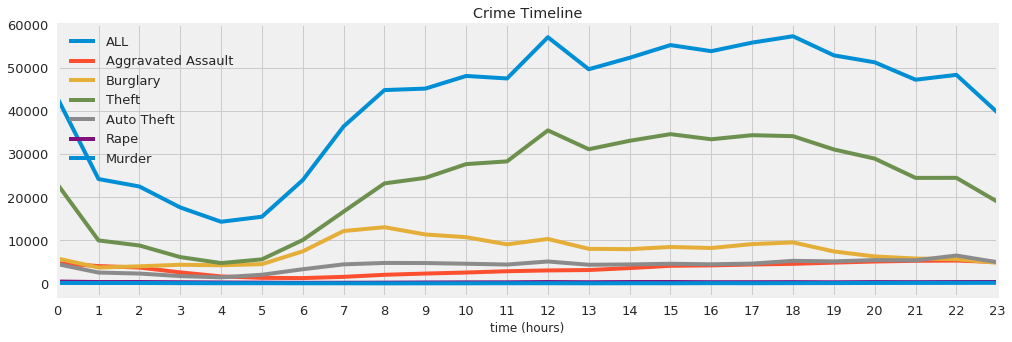

In [27]:

title = 'Crime Timeline'
xlab = 'time (hours)'
ylab= ''
time_plot7d(df,'ALL',
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

In [28]:
def time_plot2d(f1,f1_name,f2,f2_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.hour)['{}'.format(col)].count().plot(xlim=(0,23))
    ax = f2.groupby(f2.index.hour)['{}'.format(col)].count().plot()
    ax.set_xticks(np.arange(0, 23))
    #ax.set_facecolor('xkcd:white')

    #ax.set_xticklabels(f1.hour)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name])
    plt.show()

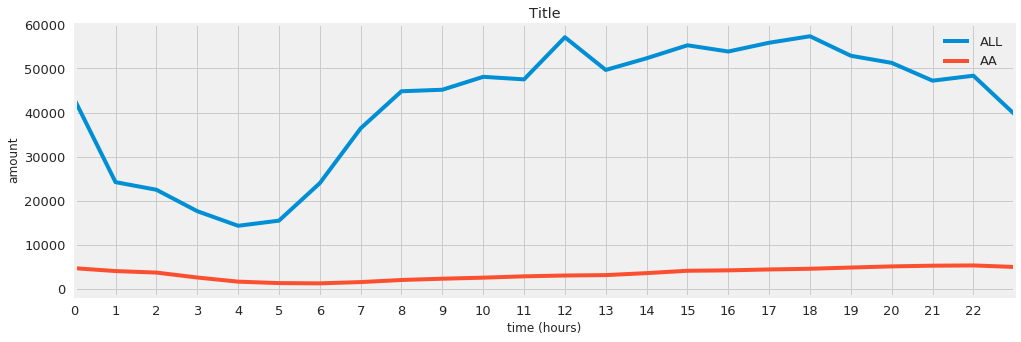

In [29]:
title = 'Title'
xlab = 'time (hours)'
ylab= 'amount'
time_plot2d(df,'ALL',df_aa,'AA','OffenseType',title,xlab,ylab)

In [51]:
def month_plot2d(f1,f1_name,f2,f2_name,col,title,xlab,ylab):
    plt.figure(figsize = (15,5))
    ax = f1.groupby(f1.index.strftime('%B'))['{}'.format(col)].count().plot()
    ax = f2.groupby(f2.index.strftime('%B'))['{}'.format(col)].count().plot()
    ax.set_xticks(np.arange(1, 12))
    #ax.set_facecolor('xkcd:white')

    #ax.set_xticklabels(f1.hour)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend([f1_name,f2_name])
    plt.show()

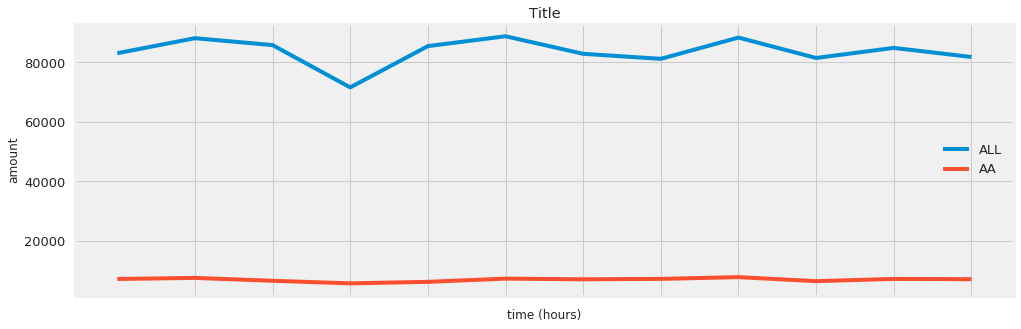

In [52]:
title = 'Title'
xlab = 'time (hours)'
ylab= 'amount'
month_plot2d(df,'ALL',df_aa,'AA','OffenseType',title,xlab,ylab)

In [34]:
def barplot(frame,col,title,xlab,ylab):    
    fig,ax = plt.subplots(figsize=(10,5))
    ax = sns.countplot(x=col,data=frame,alpha=0.75,
                       order=frame['{}'.format(col)].value_counts().index)
    
    max_value = frame['{}'.format(col)].value_counts().max()
    plt.ylim(0,max_value+max_value/2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    height_factor=1.05
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., height_factor*height,'%d' % int(height),
                ha='center', va='bottom')
    #ax.set_facecolor('xkcd:white')

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.set_title(title)
    plt.show()

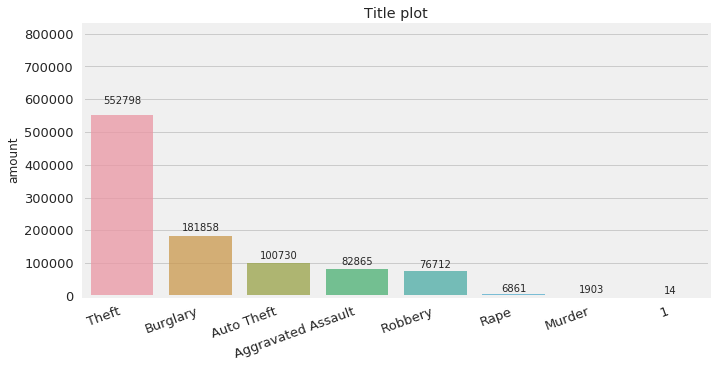

In [36]:
t='Title plot'
xlab = ''
ylab = 'amount'

barplot(df,'OffenseType',t,xlab,ylab)

In [39]:
# create a dataframe for the top 10 premises
premises = [premise for premise in df['Premise'].value_counts().head(10).reset_index()['index']]
top_premise= pd.DataFrame()  # create empty dataframe

for premise in premises:
    top_premise = pd.concat([top_premise, df[df.Premise == premise]], axis=0)

In [41]:
beats = [beat for beat in df['Beat'].value_counts().head(10).reset_index()['index']]
top_beat= pd.DataFrame()  # create empty dataframe

for beat in beats:
    top_beat = pd.concat([top_beat, df[df.Beat == beat]], axis=0)

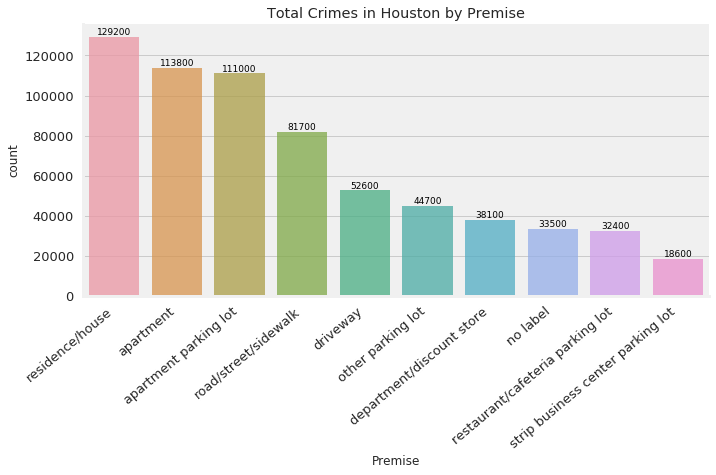

In [42]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Premise",data=top_premise, alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Total Crimes in Houston by Premise');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

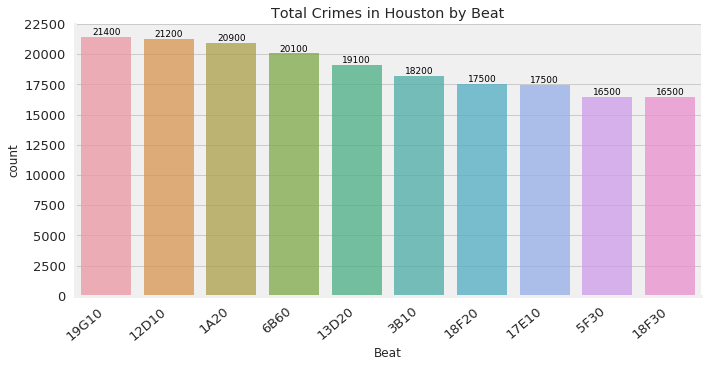

In [43]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Beat",data=top_beat, alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Total Crimes in Houston by Beat');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

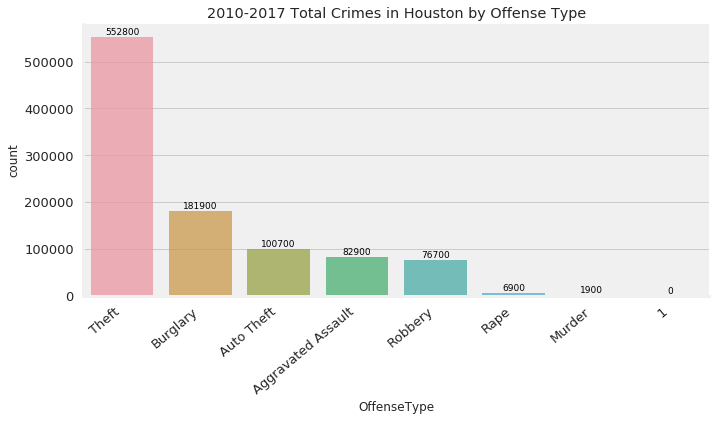

In [46]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="OffenseType", data=df,alpha=0.75,
             order=df['OffenseType'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Offense Type');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

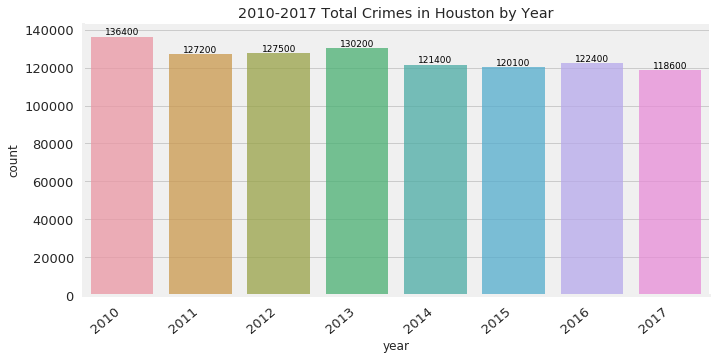

In [48]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="year", data=df,alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Year');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()